#  Adaptado por Bruno Menezes (https://github.com/brunoleomenezes) e será utilizado apenas para fins acadêmicos.

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

films = pd.read_csv("/content/movies.csv")
films.columns = ["filmId", "title", "genres"]
films = films.set_index("filmId")
films.head()

,title,genres
filmId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
grades = pd.read_csv("/content/ratings.csv")
grades.columns = ["userId", "filmId", "grade", "time"]
grades.head()

,userId,filmId,grade,time
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
"""

    Bruno deu nota 4 no filme toy story
    Vanessa deu nota 5 no filme toy story (Bruno e Vanessa parece que possuem gostos similares).
    Uilson deu nota 3 no filme toy story
    Lucia deu nota 3.5 no filme toy story (Lucia parece que tem um gosto parecido com o Bruno e Uilson).

x-y (distância por subtração)

Isto serve para um filme.
"""

'\n\n    Bruno deu nota 4 no filme toy story\n    Vanessa deu nota 5 no filme toy story (Bruno e Vanessa parece que possuem gostos similares).\n    Uilson deu nota 3 no filme toy story\n    Lucia deu nota 3.5 no filme toy story (Lucia parece que tem um gosto parecido com o Bruno e Uilson).\n\nx-y (distância por subtração)\n\nIsto serve para um filme.\n'

Text(0.5, 1.0, 'Calcular a distância entre Bruno e Vanessa')

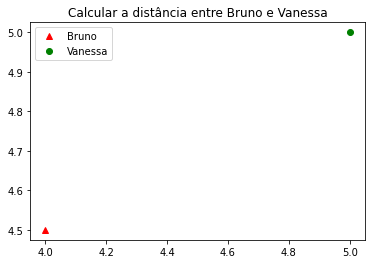

In [4]:
"""
Dois films, toy story e mulher maravilha
x e y Isto é um ponto
Bruno = [4, 4.5]
Vanessa = [5, 5]
"""
plt.plot(4, 4.5, "r^")
plt.plot(5, 5, "go")
plt.legend(["Bruno", "Vanessa"])
plt.title("Calcular a distância entre Bruno e Vanessa")

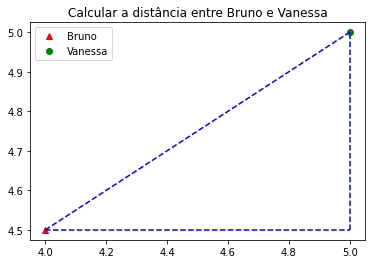

In [5]:
plt.plot(4, 4.5, "r^")
plt.plot(5, 5, "go")
plt.legend(["Bruno", "Vanessa"])
plt.title("Calcular a distância entre Bruno e Vanessa")

plt.plot([4, 5], [4.5, 4.5], color="b", linestyle="--")
plt.plot([4, 5], [4.5, 5], color="b", linestyle="--")
plt.plot([5, 5], [4.5, 5], color="b", linestyle="--")

In [6]:
bruno = np.array([4, 4.5])
vanessa = np.array([5, 5])

bruno - vanessa 

array([-1. , -0.5])

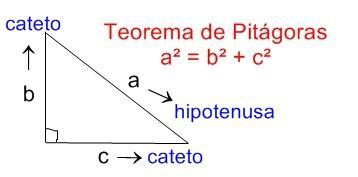

In [7]:
def pythagoras(a,b):
  (d_x, d_y) = a - b
  return sqrt(d_x * d_x + d_y * d_y)

pythagoras(bruno, vanessa)

1.118033988749895

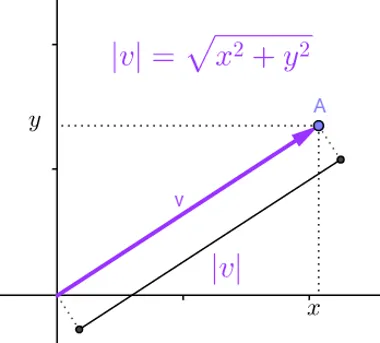

In [8]:
def pythagoras(a,b):
  return np.linalg.norm(a - b)

pythagoras(bruno, vanessa)

1.118033988749895

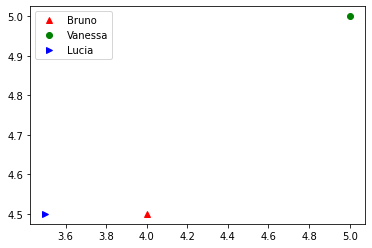

In [9]:
plt.plot(4, 4.5, "r^")
plt.plot(5, 5, "go")
plt.plot(3.5, 4.5, "b>")
plt.legend(["Bruno", "Vanessa", "Lucia"])

In [10]:
lucia = np.array([3.5, 4.5])

print(pythagoras(bruno, vanessa))
print(pythagoras(bruno, lucia))

1.118033988749895
0.5


In [11]:
def vector_distance(a,b):
  return np.linalg.norm(a - b)

In [12]:
def user_grids(user):
  user_grids = grades.query("userId==%d" % user) 
  user_grids = user_grids[["filmId", "grade"]].set_index("filmId") #
  return user_grids

In [13]:
user1 = user_grids(1)
user4 = user_grids(4)

In [14]:
user1.head()

,grade
filmId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [15]:
user4.head()

,grade
filmId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0


In [16]:
def distance_the_users(user_id1, user_id2):
  grades1 = user_grids(user_id1) 
  grades2 = user_grids(user_id2)

  diferencas = grades1.join(grades2, lsuffix="_left", rsuffix="_right").dropna()
  distance =  vector_distance(diferencas['grade_left'], diferencas['grade_right']) 
  return [user_id1, user_id2, distance]

In [17]:
distance_the_users(1,10)

[1, 10, 7.858116822750856]

In [18]:
def distance_the_all(you_id):
  all_os_users = grades['userId'].unique()
  distances = [distance_the_users(you_id, user_id) for user_id in all_os_users]
  distances = pd.DataFrame(distances, columns = ["you", "another_person", "distance"])
  return distances

distance_the_all(2).head()

,you,another_person,distance
0,2,1,1.414214
1,2,2,0.000000
2,2,3,0.000000
3,2,4,3.500000
4,2,5,0.000000


In [19]:
user_grids(2).join(user_grids(3), lsuffix="_1", rsuffix="5")

,grade_1,grade5
filmId,,
318,3.0,NaN
333,4.0,NaN
1704,4.5,NaN
3578,4.0,NaN
6874,4.0,NaN
8798,3.5,NaN
46970,4.0,NaN
48516,4.0,NaN
58559,4.5,NaN


In [20]:
user_grids(2).join(user_grids(3), lsuffix="_1", rsuffix="5").dropna()

,grade_1,grade5
filmId,,


In [21]:
user_grids(1).join(user_grids(3), lsuffix="_1", rsuffix="3").dropna()

,grade_1,grade3
filmId,,
527,5.0,0.5
1275,5.0,3.5
1587,5.0,4.5
2018,5.0,0.5
2090,5.0,0.5
2105,4.0,2.0
3703,5.0,5.0


In [22]:
def distance_the_users(user_id1, user_id2, minimo = 5): 
  grades1 = user_grids(user_id1)
  grades2 = user_grids(user_id2)
  diferencas = grades1.join(grades2, lsuffix="_left", rsuffix="_right").dropna()
  
  if(len(diferencas) < minimo):
    return [user_id1, user_id2, 100000] 
  
  distance =  vector_distance(diferencas['grade_left'], diferencas['grade_right'])
  return [user_id1, user_id2, distance]

In [23]:
distance_the_all(2).head(10)

,you,another_person,distance
0,2,1,100000.000000
1,2,2,0.000000
2,2,3,100000.000000
3,2,4,100000.000000
4,2,5,100000.000000
5,2,6,100000.000000
6,2,7,100000.000000
7,2,8,100000.000000
8,2,9,100000.000000
9,2,10,4.949747


In [24]:
def closer_to(you_id):
  distances = distance_the_all(you_id)
  distances = distances.sort_values("distance")
  distances = distances.set_index("another_person").drop(you_id)
  return distances

In [25]:
closer_to(2).head()

,you,distance
another_person,,
606,2,1.000000
189,2,1.224745
490,2,1.224745
445,2,1.322876
585,2,1.322876


In [26]:
def closer_to(you_id, n = None): 
  distances = distance_the_all(you_id, n = n)
  distances = distances.sort_values("distance")
  distances = distances.set_index("another_person").drop(you_id)
  return distances

In [27]:
def distance_the_all(you_id, n = None):
  all_os_users = grades['userId'].unique()
  if n: 
    all_os_users = all_os_users[:n]
  distances = [distance_the_users(you_id, user_id) for user_id in all_os_users]
  distances = pd.DataFrame(distances, columns = ["you", "another_person", "distance"])
  return distances

In [28]:
closer_to(2, n = 50) 

,you,distance
another_person,,
16,2,2.000000
29,2,2.179449
17,2,2.179449
25,2,2.236068
24,2,2.291288
28,2,2.397916
22,2,3.000000
30,2,3.391165
21,2,4.153312


In [29]:
def distance_the_users(user_id1, user_id2, minimo = 5):
  grades1 = user_grids(user_id1)
  grades2 = user_grids(user_id2)
  diferencas = grades1.join(grades2, lsuffix="_left", rsuffix="_right").dropna()
  
  if(len(diferencas) < minimo): 
    return None
  
  distance =  vector_distance(diferencas['grade_left'], diferencas['grade_right'])
  return [user_id1, user_id2, distance]

In [30]:
def distance_the_all(you_id, number_the_users_to_analyze = None):
  all_os_users = grades['userId'].unique()
  if number_the_users_to_analyze:
    all_os_users = all_os_users[:number_the_users_to_analyze]
  distances = [distance_the_users(you_id, user_id) for user_id in all_os_users]
  distances = list(filter(None, distances)) 
  distances = pd.DataFrame(distances, columns = ["you", "another_person", "distance"])
  return distances

In [31]:
def closer_to(you_id, number_the_users_to_analyze = None):
  distances = distance_the_all(you_id, number_the_users_to_analyze = number_the_users_to_analyze)
  distances = distances.sort_values("distance")
  distances = distances.set_index("another_person").drop(you_id)
  return distances

In [32]:
closer_to(2, number_the_users_to_analyze = 50) 

,you,distance
another_person,,
16,2,2.000000
17,2,2.179449
29,2,2.179449
25,2,2.236068
24,2,2.291288
28,2,2.397916
22,2,3.000000
30,2,3.391165
21,2,4.153312


In [33]:
def suggests_to(you, number_the_users_to_analyze = None): 
  grades_the_you = user_grids(you)
  films_que_you_have_you_seen = grades_the_you.index

  similares = closer_to(you, number_the_users_to_analyze = number_the_users_to_analyze)
  similar = similares.iloc[0].name
  grades_do_similar = user_grids(similar)
  grades_do_similar = grades_do_similar.drop(films_que_you_have_you_seen, errors='ignore') 
  recommendations = grades_do_similar.sort_values("grade", ascending=False)
  return recommendations.join(films)

In [34]:
suggests_to(2, number_the_users_to_analyze=50).head(10)

,grade,title,genres
filmId,,,
1199,5.0,Brazil (1985),Fantasy|Sci-Fi
78499,4.5,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX
1252,4.5,Chinatown (1974),Crime|Film-Noir|Mystery|Thriller
750,4.5,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
4226,4.5,Memento (2000),Mystery|Thriller
608,4.5,Fargo (1996),Comedy|Crime|Drama|Thriller
5618,4.5,Spirited Away (Sen to Chihiro no kamikakushi) ...,Adventure|Animation|Fantasy
541,4.5,Blade Runner (1982),Action|Sci-Fi|Thriller
1222,4.5,Full Metal Jacket (1987),Drama|War


In [35]:
suggests_to(2).head(10)

,grade,title,genres
filmId,,,
3083,5.0,All About My Mother (Todo sobre mi madre) (1999),Drama
2360,5.0,"Celebration, The (Festen) (1998)",Drama
27815,5.0,"Chorus, The (Choristes, Les) (2004)",Drama
296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3451,5.0,Guess Who's Coming to Dinner (1967),Drama
3310,5.0,"Kid, The (1921)",Comedy|Drama
63082,5.0,Slumdog Millionaire (2008),Crime|Drama|Romance
931,5.0,Spellbound (1945),Mystery|Romance|Thriller
3000,5.0,Princess Mononoke (Mononoke-hime) (1997),Action|Adventure|Animation|Drama|Fantasy


In [36]:
def closer_to(you_id, n_most_close=10, number_the_users_to_analyze = None):
  distances = distance_the_all(you_id, number_the_users_to_analyze = number_the_users_to_analyze)
  distances = distances.sort_values("distance")
  distances = distances.set_index("another_person").drop(you_id)
  return distances.head(n_most_close) 

In [37]:
closer_to(2, n_most_close = 2, number_the_users_to_analyze=300) 

,you,distance
another_person,,
189,2,1.224745
131,2,1.322876


In [38]:
def suggests_to(you, n_most_close = 10, number_the_users_to_analyze = None):
  grades_the_you = user_grids(you)
  films_que_you_have_you_seen = grades_the_you.index

  similares = closer_to(you, n_most_close = n_most_close, number_the_users_to_analyze = number_the_users_to_analyze)
  users_similares = similares.index
  grades_dos_similares = grades.set_index("userId").loc[users_similares] 
  recommendations = grades_dos_similares.groupby("filmId").mean()[["grade"]] 
  recommendations = recommendations.sort_values("grade", ascending=False) 
  return recommendations.join(films) 

In [39]:
suggests_to(2, number_the_users_to_analyze = 50).head()

,grade,title,genres
filmId,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi
5872,5.0,Die Another Day (2002),Action|Adventure|Thriller
1722,5.0,Tomorrow Never Dies (1997),Action|Adventure|Thriller
47997,5.0,Idiocracy (2006),Adventure|Comedy|Sci-Fi|Thriller
1952,5.0,Midnight Cowboy (1969),Drama


In [40]:
suggests_to(2, number_the_users_to_analyze = 300).head() 

,grade,title,genres
filmId,,,
2010,5.0,Metropolis (1927),Drama|Sci-Fi
1279,5.0,Night on Earth (1991),Comedy|Drama
1243,5.0,Rosencrantz and Guildenstern Are Dead (1990),Comedy|Drama
4014,5.0,Chocolat (2000),Drama|Romance
1251,5.0,8 1/2 (8½) (1963),Drama|Fantasy


In [41]:
suggests_to(2).head()

,grade,title,genres
filmId,,,
116897,5.0,Wild Tales (2014),Comedy|Drama|Thriller
7767,5.0,"Best of Youth, The (La meglio gioventù) (2003)",Drama
7579,5.0,Pride and Prejudice (1940),Comedy|Drama|Romance
51662,5.0,300 (2007),Action|Fantasy|War|IMAX
7439,5.0,"Punisher, The (2004)",Action|Crime|Thriller


In [42]:
def knn(you_id, k_mais_proximos=10, number_the_users_to_analyze = None):
  distances = distance_the_all(you_id, number_the_users_to_analyze = number_the_users_to_analyze)
  distances = distances.sort_values("distance")
  distances = distances.set_index("another_person").drop(you_id)
  return distances.head(k_mais_proximos)

In [43]:
def suggests_to(you, k_mais_proximos = 10, number_the_users_to_analyze = None):
  grades_the_you = user_grids(you)
  films_que_you_have_you_seen = grades_the_you.index

  similares = knn(you, k_mais_proximos = k_mais_proximos, number_the_users_to_analyze = number_the_users_to_analyze)
  users_similares = similares.index
  grades_dos_similares = grades.set_index("userId").loc[users_similares]
  recommendations = grades_dos_similares.groupby("filmId").mean()[["nota"]]
  recommendations = recommendations.sort_values("nota", ascending=False)
  return recommendations.join(films)